In [1]:
import sys
sys.path.insert(0, "/global/u1/p/prakharb/desilike")

In [2]:
import desilike, inspect
print(inspect.getfile(desilike))

/global/u1/p/prakharb/desilike/desilike/__init__.py


In [3]:
import re
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from desilike.jax import numpy as jnp
from desilike.jax import jit, interp1d
from desilike import jax
from desilike import plotting, utils, BaseCalculator
from desilike.theories.galaxy_clustering.base import BaseTheoryPowerSpectrumMultipolesFromWedges, BaseTheoryPowerSpectrumMultipoles
from desilike.theories.galaxy_clustering.full_shape import BasePTPowerSpectrumMultipoles, FOLPSPowerSpectrumMultipoles, BaseTracerPowerSpectrumMultipoles
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# from .base import BaseTheoryPowerSpectrumMultipoles, BaseTheoryCorrelationFunctionMultipoles, BaseTheoryCorrelationFunctionFromPowerSpectrumMultipoles
# from .power_template import DirectPowerSpectrumTemplate, StandardPowerSpectrumTemplate

In [4]:
from desilike.theories.galaxy_clustering.full_shape import DirectPowerSpectrumTemplate, KaiserTracerPowerSpectrumMultipoles, SimpleTracerPowerSpectrumMultipoles, FOLPSAXTracerPowerSpectrumMultipoles,FOLPSTracerPowerSpectrumMultipoles,FOLPSv2TracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.parameter import ParameterCollection
from desilike import setup_logging
# from desilike_private.theories.galaxy_clustering.full_shape import FOLPSv2TracerPowerSpectrumMultipoles

z=1.
template = DirectPowerSpectrumTemplate(z=z, fiducial='DESI')
for param in ['omega_b', 'n_s']: template.params[param].update(fixed=True)
# theory = FOLPSAXPowerSpectrumMultipoles(template=template)
theory2 = FOLPSv2TracerPowerSpectrumMultipoles(template=template,prior_basis='standard',kernels='fk')
theory3 = FOLPSv2TracerPowerSpectrumMultipoles(template=template,prior_basis='standard',kernels='eds')

# theory.compute()

In [5]:

theory2.init.params['X_FoG_p'].update(value=10.)
theory3.init.params['X_FoG_p'].update(value=0.)

In [5]:
a,b,c=theory2()
d,e,f= theory3()


✅ Using NumPy with CPU.
Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy
4params (array([9.95396231e-06, 1.00927151e-05, 1.02334021e-05, ...,
       1.95245558e+02, 1.97967175e+02, 2.00726730e+02]), array([0.99999293, 0.99999293, 0.99999293, ..., 0.9972944 , 0.9972944 ,
       0.9972944 ]), 0.8767977522051971)
Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy
Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy


In [5]:
a,b,c=theory2()

✅ Using NumPy with CPU.
Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy
4params (array([9.95396231e-06, 1.00927151e-05, 1.02334021e-05, ...,
       1.95245558e+02, 1.97967175e+02, 2.00726730e+02]), array([0.99999293, 0.99999293, 0.99999293, ..., 0.9972944 , 0.9972944 ,
       0.9972944 ]), 0.8767977522051971)


In [10]:
cosmo = getattr(template, 'cosmo', None)
cosmo['']

CosmologyError: Parameter As not found.

Text(0.5, 1.0, 'l=0')

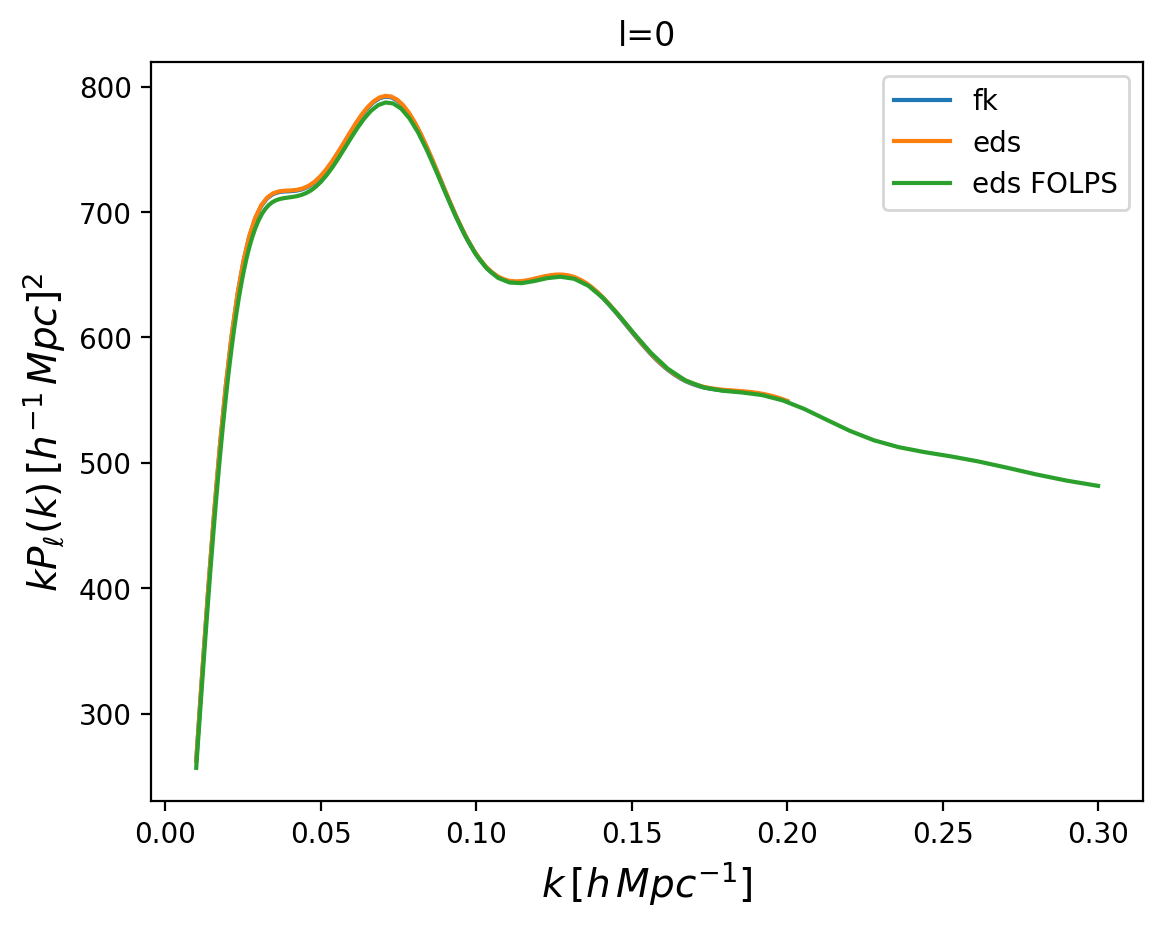

In [13]:
k=theory2.k
plt.plot(k,k*a,label='fk')
plt.plot(k,k*d,label='eds')
plt.plot(folps_k,folps_k*P0,label='eds FOLPS')
plt.legend()
plt.xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
plt.ylabel(r'$k P_{\ell}(k) \, [h^{-1} \,  Mpc]^2$', fontsize =  14)
plt.title('l=0')

In [21]:
for param in theory2.init.params:
    print(f"{param.name}: value = {param.value}, fixed = {param.fixed}")

b1: value = 1.5, fixed = False
b2: value = 0.0, fixed = False
bs: value = 0.0, fixed = False
b3: value = 0.0, fixed = True
alpha0: value = 0.0, fixed = False
alpha2: value = 0.0, fixed = False
alpha4: value = 0.0, fixed = False
ct: value = 0.0, fixed = True
sn0: value = 0.0, fixed = False
sn2: value = 0.0, fixed = False
sn4: value = 0.0, fixed = False
X_FoG_p: value = 0.0, fixed = False


In [22]:
for param in theory2.template.init.params:
    print(f"{param.name}: value = {param.value}, fixed = {param.fixed}")

h: value = 0.6736, fixed = False
omega_cdm: value = 0.12, fixed = False
omega_b: value = 0.02237, fixed = True
logA: value = 3.036394, fixed = False
n_s: value = 0.9649, fixed = True
tau_reio: value = 0.0544, fixed = True
m_ncdm: value = 0.06, fixed = True
N_eff: value = 3.046, fixed = True
w0_fld: value = -1.0, fixed = True
wa_fld: value = 0.0, fixed = True
Omega_k: value = 0.0, fixed = True


In [13]:
np.exp(3.036394)/10**10

2.0829994682666578e-09

In [7]:
import os

# Select the backend before importing folps.py
os.environ["FOLPS_BACKEND"] = "numpy"  #'numpy' or 'jax'

from folps import *
from cosmo_class import *

In [12]:
%%time
#linear power spectrum
classy  = run_class(h = 0.6736, ombh2 = 0.02237, omch2 = 0.122, omnuh2 = 0.06/93.14, 
                    As = 2.0829994682666578e-09, ns = 0.9649, z = 1, z_scale=[0.97],
                    N_ur = 2.0328,
                    khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')
kwargs = {'z': 1., 'h': 0.6736, 'Omega_m': classy['cosmo'].Omega0_m(),
          'fnu':classy['cosmo'].scale_independent_growth_factor_f(1.)}

matrix = MatrixCalculator(A_full=False)
mmatrices = matrix.get_mmatrices()


nonlinear = NonLinearPowerSpectrumCalculator(mmatrices=mmatrices,
                                             kernels='fk',
                                             **kwargs)

table, table_now = nonlinear.calculate_loop_table(k=classy['k'], pklin=classy['pk'],cosmo=classy['cosmo'], **kwargs)

# Bias parameters
b1 = 1.5
b2 = 0
bs2 = -4./7*(b1 - 1)
b3nl = 32./315*(b1 - 1)
# EFT parameters
alpha0 = 0                #units: [Mpc/h]^2
alpha2 =0         #units: [Mpc/h]^2
alpha4 = 0.0               #units: [Mpc/h]^2
ctilde = 0.0               #units: [Mpc/h]^4
# Stochatic parameters
PshotP = 1. /1e-4
alphashot0 = 0.0
alphashot2 = 0.0         #units: [Mpc/h]^2
X_Fog_pk = 0
pars = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP, X_Fog_pk]
qpar, qper = 1., 1.


folps_k = np.logspace(np.log10(0.01), np.log10(0.3), num=100) # array of  output k in [h/Mpc]
multipoles = RSDMultipolesPowerSpectrumCalculator()#model='EFT'
P0, P2, P4  = multipoles.get_rsd_pkell(kobs=folps_k, qpar=qpar, qper=qper, pars=pars,
                                       table=table, table_now=table_now,
                                       bias_scheme='folps', damping=None)


Loading matrices from matrices_nfftlog128_Afull_False_remove-DeltaP_False.npy
4params (array([9.92788797e-06, 1.00267966e-05, 1.01266905e-05, ...,
       1.96970077e+02, 1.98932431e+02, 2.00914335e+02]), array([0.99806   , 0.99806   , 0.99806   , ..., 0.24829599, 0.24829278,
       0.24828961]), 0.8788752487223046)
CPU times: user 37 s, sys: 2.73 s, total: 39.7 s
Wall time: 604 ms


In [12]:
template.init.update(with_now='peakaverage')
template()
template.calculate()
# theory.initialize()
# theory.calculate()

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


In [13]:
print(hasattr(template, 'pk_dd'))       # should be True
print(hasattr(template, 'pknow_dd'))    # should be True
print(template.pk_dd.shape) 

True
True
(400,)


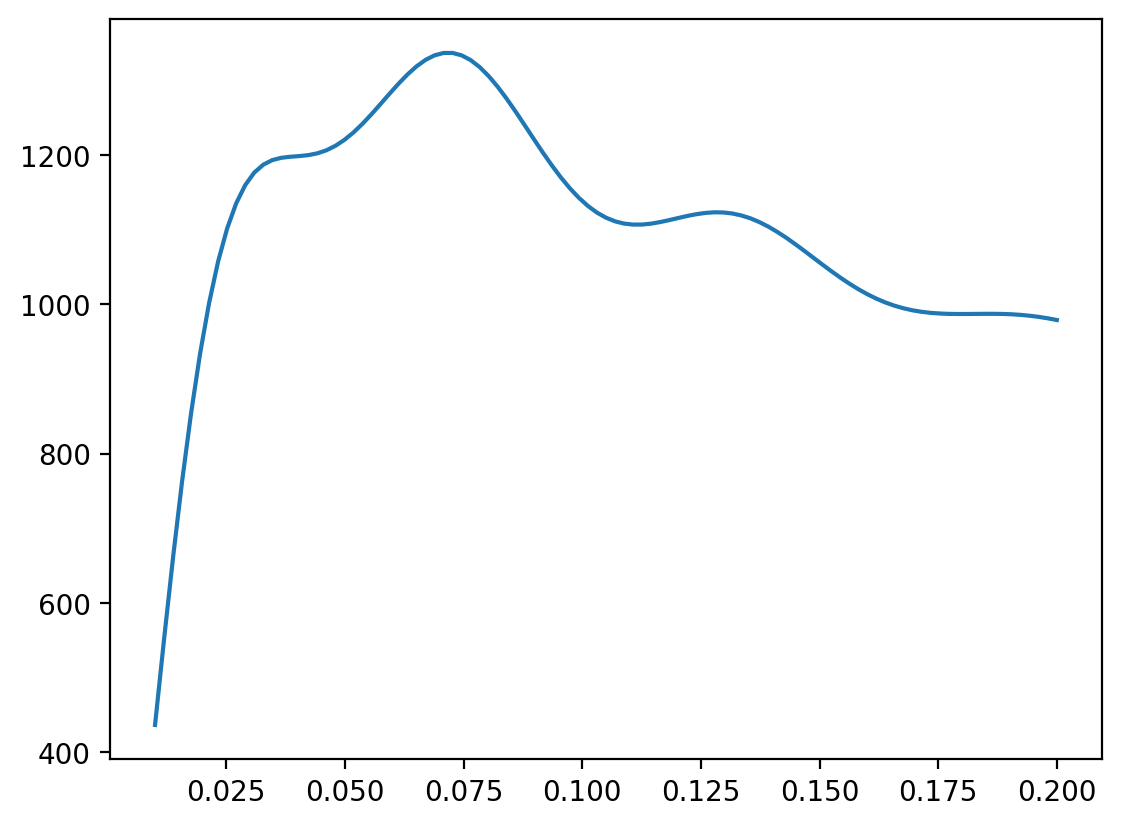

In [40]:
plt.plot(theory.k,a*theory.k)

In [4]:
# import folps
import desilike
print(desilike.__file__)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/desilike/main/lib/python3.10/site-packages/desilike/__init__.py


In [22]:
theory2.initialize()
theory2.calculate()

Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


AttributeError: <desilike.theories.primordial_cosmology.Cosmoprimo object at 0x7f1e2879fd30> has not attribute cosmo; try calling it first?

In [8]:
pars = [1.0, 0.5, 0.3, 0.1, 0.01, 0.02, 0.03, 0.04, 0.001, 0.002, 0.0]
theory2()

Loading matrices from matrices_nfftlog128_Afull_True_remove-DeltaP_False.npy


AttributeError: calculator FOLPSv2PowerSpectrumMultipoles has no attribute kt; have you run any calculation already by calling this calculator or calculators that depend on it (typically, a likelihood?)

In [19]:
dir(theory)

['__call__',
 '__class__',
 '__clear__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_default_options',
 '_get_non_linear',
 '_klim',
 '_mpicomm',
 '_pt_attrs',
 'all_params',
 'calculate',
 'combine_bias_terms_poles',
 'copy',
 'deepcopy',
 'ells',
 'from_state',
 'fsigma8',
 'get',
 'info',
 'init',
 'initialize',
 'install',
 'k',
 'kt',
 'load',
 'log_critical',
 'log_debug',
 'log_error',
 'log_info',
 'log_warning',
 'logger',
 'matrices',
 'mpicomm',
 'mu',
 'options',
 'params',
 'pt',
 'runtime_info',
 'save',
 'set_k_mu',
 'sigma8',
 'template',
 'to_poles',
 'varied_params',
 'wmu',
 'z']

In [25]:
p = theory.calculate

In [28]:
theory.calculate

<bound method FOLPSAXPowerSpectrumMultipoles.calculate of <__main__.FOLPSAXPowerSpectrumMultipoles object at 0x7f44242b3a30>>

In [29]:
a,b,c=theory()

TypeError: cannot unpack non-iterable NoneType object

In [2]:
import desilike

In [3]:
desilike._file_

AttributeError: module 'desilike' has no attribute '_file_'

/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/cosmodesi/desilike to /tmp/pip-req-build-hqkq_qr2
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/desilike /tmp/pip-req-build-hqkq_qr2
  Resolved https://github.com/cosmodesi/desilike to commit c948d980209378c1596562eb90cfa4319e53b1a5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/cosmodesi/cosmoprimo to /tmp/pip-install-39jfedb5/cosmoprimo_b57a05c0d15e4b418b8ddd222ad07a94
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/cosmoprimo /tmp/pip-install-39jfedb5/cos

In [3]:
!python -m pip install git+https://github.com/cosmodesi/desilike

  Cloning https://github.com/cosmodesi/desilike to /tmp/pip-req-build-m70walvh
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/desilike /tmp/pip-req-build-m70walvh
  Resolved https://github.com/cosmodesi/desilike to commit c948d980209378c1596562eb90cfa4319e53b1a5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/cosmodesi/cosmoprimo to /tmp/pip-install-sje7gw1i/cosmoprimo_a8ff0fa10f2f40d7ad366e7ebcc31d6c
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/cosmoprimo /tmp/pip-install-sje7gw1i/cosmoprimo_a8ff0fa10f2f40d7ad366e7ebcc31d6c
  Resolved https://github.com/cosmodesi/cosmoprimo to commit f35dec664b50dea83033204a8cdb6ec586be30b9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
from folps import  f_over_f0_EH


In [15]:
kwargs = {'z': 1., 'h': 0.6736, 'Omega_m': classy['cosmo'].Omega0_m(),
          'fnu':classy['cosmo'].scale_independent_growth_factor_f(1.)}
f_over_f0_EH(zev=kwargs['z'], k=folps_k, OmM0=classy['cosmo'].Omega0_m(), h=kwargs['h'], fnu=kwargs['fnu'], Nnu=3, Neff=3.046)

(array([0.01      , 0.01034952, 0.01071127, 0.01108565, 0.01147312,
        0.01187414, 0.01228917, 0.01271871, 0.01316326, 0.01362334,
        0.01409951, 0.01459233, 0.01510237, 0.01563023, 0.01617655,
        0.01674196, 0.01732713, 0.01793276, 0.01855955, 0.01920826,
        0.01987963, 0.02057447, 0.0212936 , 0.02203787, 0.02280815,
        0.02360535, 0.02443041, 0.02528432, 0.02616807, 0.02708271,
        0.02802932, 0.02900901, 0.03002295, 0.03107233, 0.03215838,
        0.0332824 , 0.0344457 , 0.03564966, 0.03689571, 0.0381853 ,
        0.03951998, 0.0409013 , 0.0423309 , 0.04381047, 0.04534176,
        0.04692656, 0.04856676, 0.05026429, 0.05202116, 0.05383943,
        0.05572125, 0.05766884, 0.05968452, 0.06177064, 0.06392968,
        0.06616418, 0.06847678, 0.07087022, 0.07334731, 0.07591098,
        0.07856426, 0.08131027, 0.08415227, 0.0870936 , 0.09013774,
        0.09328828, 0.09654894, 0.09992356, 0.10341614, 0.1070308 ,
        0.11077179, 0.11464354, 0.11865062, 0.12

In [19]:
template.f0

0.8766185289981336